step 1: Import Libraries


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


step 2:  Load Data

In [4]:
# Load the dataset
df = pd.read_csv('../data/creditcard.csv')

print(f"📊 Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst 3 rows:")
df.head(3)

📊 Dataset loaded successfully!
Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First 3 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


step 3: Basic Check

In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

# Class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())
print(f"Fraud percentage: {df['Class'].mean()*100:.4f}%")

Missing values:
0

Data types:
float64    30
int64       1
Name: count, dtype: int64

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Fraud percentage: 0.1727%


step 4: Time-Based Features

In [6]:
# Create hour of day feature
df['Hour'] = (df['Time'] / 3600) % 24
df['Hour'] = df['Hour'].astype(int)

# Create time period categories
def get_time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time_Period'] = df['Hour'].apply(get_time_period)

print("✅ Time features created!")
print("\nTime period distribution:")
print(df['Time_Period'].value_counts())

✅ Time features created!

Time period distribution:
Time_Period
Afternoon    96435
Evening      93526
Morning      70912
Night        23934
Name: count, dtype: int64


step 5: Amount-Based Features

In [7]:
# Log transformation for Amount (handles skewness)
df['Amount_Log'] = np.log1p(df['Amount'])

# Amount buckets
def get_amount_category(amount):
    if amount == 0:
        return 'Zero'
    elif amount < 50:
        return 'Low'
    elif amount < 200:
        return 'Medium'
    elif amount < 1000:
        return 'High'
    else:
        return 'Very High'

df['Amount_Category'] = df['Amount'].apply(get_amount_category)

print("✅ Amount features created!")
print("\nAmount category distribution:")
print(df['Amount_Category'].value_counts())

✅ Amount features created!

Amount category distribution:
Amount_Category
Low          187879
Medium        65788
High          26246
Very High      3069
Zero           1825
Name: count, dtype: int64


step 6: Statistical Features

In [9]:
# Sort by time
df = df.sort_values('Time')

# Create rolling transaction count (last 1 hour = 3600 seconds)
transactions_last_hour = []

times = df['Time'].values

for i in range(len(times)):
    start_time = times[i] - 3600
    count = ((times >= start_time) & (times <= times[i])).sum()
    transactions_last_hour.append(count)

df['Transactions_Last_Hour'] = transactions_last_hour

print("✅ Statistical features created!")
print(df[['Time','Transactions_Last_Hour']].head())


✅ Statistical features created!
   Time  Transactions_Last_Hour
0   0.0                       2
1   0.0                       2
2   1.0                       4
3   1.0                       4
4   2.0                       6


step 7:  Visualize New Features

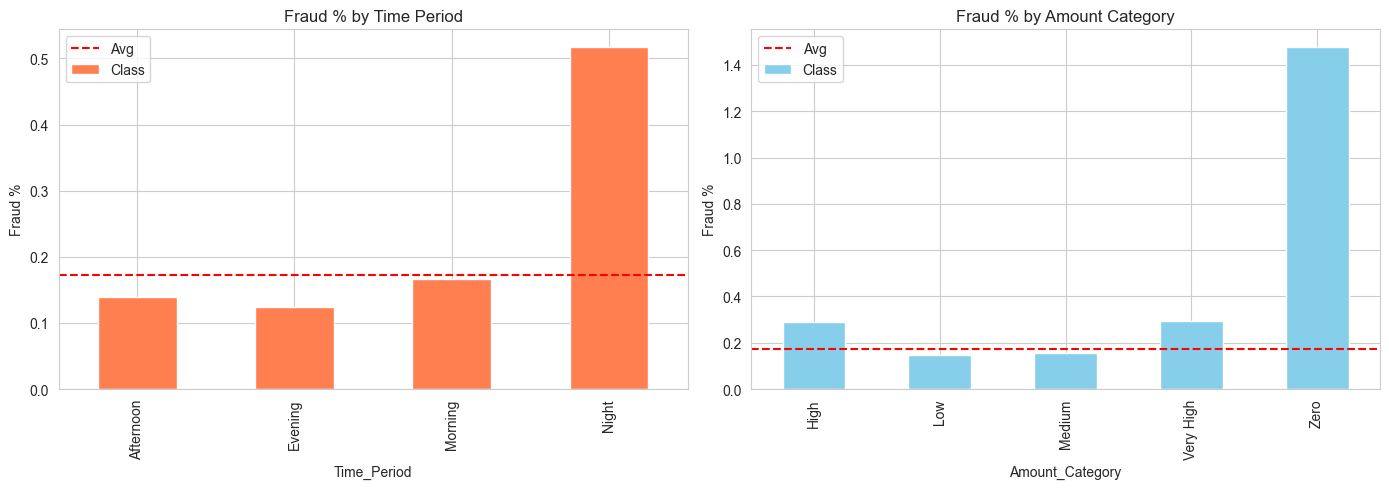

✅ Feature analysis complete!


In [10]:
# Fraud distribution by time period
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# By time period
fraud_by_period = df.groupby('Time_Period')['Class'].mean() * 100
fraud_by_period.plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Fraud % by Time Period')
axes[0].set_ylabel('Fraud %')
axes[0].axhline(y=0.173, color='red', linestyle='--', label='Avg')
axes[0].legend()

# By amount category
fraud_by_amount = df.groupby('Amount_Category')['Class'].mean() * 100
fraud_by_amount.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Fraud % by Amount Category')
axes[1].set_ylabel('Fraud %')
axes[1].axhline(y=0.173, color='red', linestyle='--', label='Avg')
axes[1].legend()

plt.tight_layout()
plt.show()

print("✅ Feature analysis complete!")

step 8: One-Hot Encoding

In [11]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Time_Period', 'Amount_Category'], drop_first=True)

print(f"✅ Encoding complete!")
print(f"Shape before: {df.shape}")
print(f"Shape after: {df_encoded.shape}")
print(f"\nNew columns added: {df_encoded.shape[1] - df.shape[1]}")

✅ Encoding complete!
Shape before: (284807, 36)
Shape after: (284807, 41)

New columns added: 5


step 9: Prepare X and y

In [12]:
# Drop original Time and Amount (we have engineered features)
X = df_encoded.drop(['Time', 'Amount', 'Class'], axis=1)
y = df_encoded['Class']

print(f"✅ Features and target separated!")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(X.columns.tolist())

✅ Features and target separated!
X shape: (284807, 38)
y shape: (284807,)

Feature columns (38):
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Hour', 'Amount_Log', 'Transactions_Last_Hour', 'Time_Period_Evening', 'Time_Period_Morning', 'Time_Period_Night', 'Amount_Category_Low', 'Amount_Category_Medium', 'Amount_Category_Very High', 'Amount_Category_Zero']


step 10: Train-Test Split

In [13]:
# Stratified split (maintains fraud ratio in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,      # 30% for testing
    stratify=y,         # Keep fraud ratio same
    random_state=42
)

print(f"✅ Train-test split complete!")
print(f"\nTraining set:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  Fraud %: {y_train.mean()*100:.4f}%")

print(f"\nTest set:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"  Fraud %: {y_test.mean()*100:.4f}%")

✅ Train-test split complete!

Training set:
  X_train: (199364, 38)
  y_train: (199364,)
  Fraud %: 0.1725%

Test set:
  X_test: (85443, 38)
  y_test: (85443,)
  Fraud %: 0.1732%


step 11: Feature Scaling

In [14]:
# Standardize features (important for many algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Feature scaling complete!")
print(f"\nSample scaled values:")
print(X_train_scaled.head(3))

✅ Feature scaling complete!

Sample scaled values:
              V1        V2        V3        V4        V5        V6        V7  \
249927 -0.005578  0.427819  0.108347 -0.534196  0.425864 -0.489116  0.676802   
214082  0.904109 -0.110138 -1.449361  0.840920  0.442776 -0.760782  0.736596   
106005 -0.550544 -2.676901 -0.919977  0.331363 -1.496917 -0.573444  1.283049   

              V8        V9       V10       V11       V12       V13       V14  \
249927 -0.000318 -0.169658 -0.204597  0.371251  0.384925 -0.652691  0.436586   
214082 -0.322162 -0.291515  0.473742  0.481194  0.246875 -1.060356  1.296021   
106005 -0.590546 -1.174846  0.078881 -0.367839  0.190313  1.053390  0.439540   

             V15       V16       V17       V18       V19       V20       V21  \
249927 -1.103969  0.260220 -0.872575 -0.080811  0.404492 -0.048050 -0.313204   
214082 -0.474665 -0.153535 -0.851352  0.391443 -0.020389 -0.037888  0.379249   
106005  0.878206 -1.500058  0.069785  1.090848 -1.335724  2.820226 